# 数据初探

In [131]:
import pandas as pd

data = pd.read_csv("input/HR.csv")
data.iloc[:12000, :].to_csv("input/HR_train.csv", index=False)
data.iloc[12001:, :].to_csv("input/HR_test.csv", index=False)

data_train = pd.read_csv("input/HR_train.csv")
data_train.iloc[:5, :]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 查看数据列信息

In [132]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       12000 non-null float64
last_evaluation          12000 non-null float64
number_project           12000 non-null int64
average_montly_hours     12000 non-null int64
time_spend_company       12000 non-null int64
Work_accident            12000 non-null int64
left                     12000 non-null int64
promotion_last_5years    12000 non-null int64
sales                    12000 non-null object
salary                   12000 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 937.6+ KB


## 列数据信息

- RangeIndex => 索引
- satisfaction_level => 满意度
- last_evaluation => 最近一次的评估
- number_project =>  项目数
- average_montly_hours => 
- time_spend_company => 平均月工作时间
- Work_accident => 花在公司的时间
- left => 是否发生过工伤事故
- promotion_last_5years => 在过去5年中是否有升值
- sales => 
- salary => 工资是否可以达到预期

## 数据描述

In [133]:
data_train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.629463,0.716558,3.801833,200.437917,3.364667,0.154167,0.166667,0.016917
std,0.241100,0.168368,1.163906,48.740178,1.329787,0.361123,0.372694,0.128965
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.500000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 数据初步分析

## 各属性分布

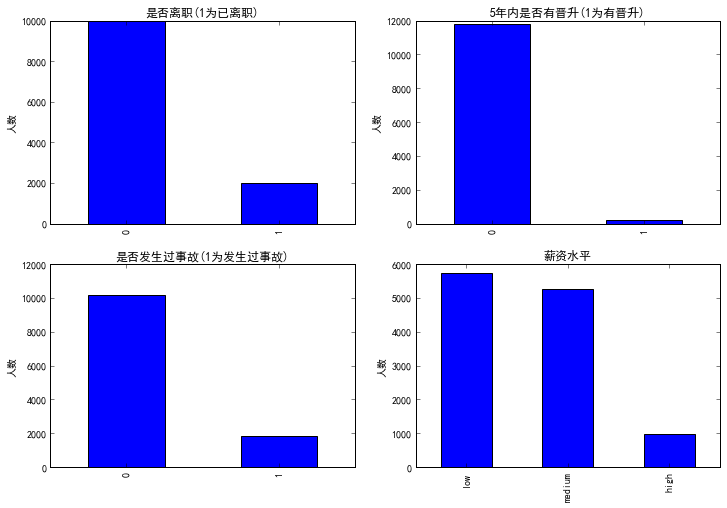

In [134]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

plt.subplot2grid((2, 2), (0, 0))
data_train.left.value_counts().plot(kind="bar")
plt.title("是否离职(1为已离职)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (0, 1))
data_train.promotion_last_5years.value_counts().plot(kind="bar")
plt.title("5年内是否有晋升(1为有晋升)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (1, 0))
data_train.Work_accident.value_counts().plot(kind="bar")
plt.title("是否发生过事故(1为发生过事故)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (1, 1))
data_train.salary.value_counts().plot(kind="bar")
plt.title("薪资水平")
plt.ylabel("人数")

plt.show()

## 属性与离职结果的关联统计

### 看看各薪资水平与离职结果的关联统计

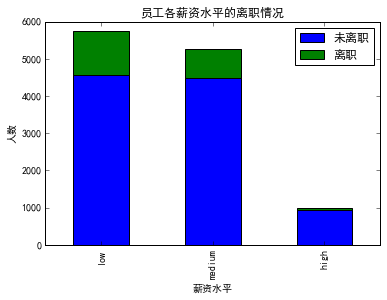

In [135]:
left_0 = data_train.salary[data_train.left == 0].value_counts()
left_1 = data_train.salary[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("员工各薪资水平的离职情况")
plt.xlabel("薪资水平")
plt.ylabel("人数")
plt.show()

### 是否有晋升与离职结果的关联统计

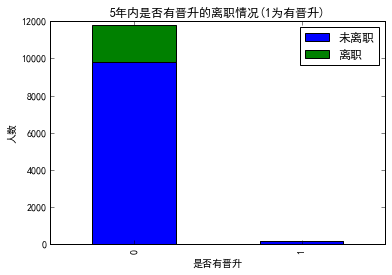

In [136]:
left_0 = data_train.promotion_last_5years[data_train.left == 0].value_counts()
left_1 = data_train.promotion_last_5years[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("5年内是否有晋升的离职情况(1为有晋升)")
plt.xlabel("是否有晋升")
plt.ylabel("人数")
plt.show()

### 是否发生过事故与离职结果的关联统计

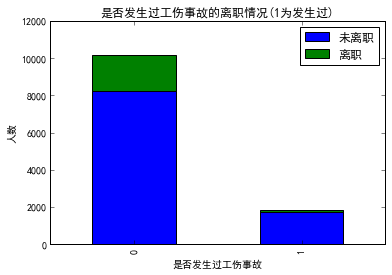

In [137]:
left_0 = data_train.Work_accident[data_train.left == 0].value_counts()
left_1 = data_train.Work_accident[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("是否发生过工伤事故的离职情况(1为发生过)")
plt.xlabel("是否发生过工伤事故")
plt.ylabel("人数")
plt.show()

### 项目数与离职结果的关联统计

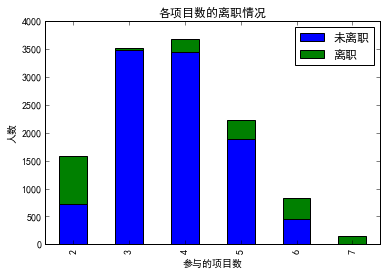

In [138]:
left_0 = data_train.number_project[data_train.left == 0].value_counts()
left_1 = data_train.number_project[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("各项目数的离职情况")
plt.xlabel("参与的项目数")
plt.ylabel("人数")
plt.show()

### 加班时长

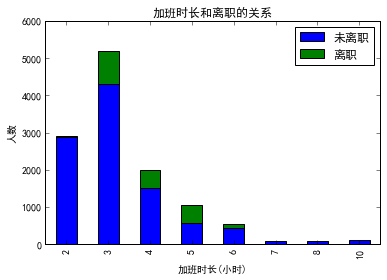

In [139]:
left_0 = data_train.time_spend_company[data_train.left == 0].value_counts()
left_1 = data_train.time_spend_company[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("加班时长和离职的关系")
plt.xlabel("加班时长(小时)")
plt.ylabel("人数")
plt.show()

### 所属行业

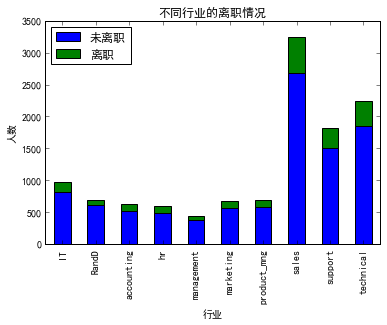

In [140]:
left_0 = data_train.sales[data_train.left == 0].value_counts()
left_1 = data_train.sales[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("不同行业的离职情况")
plt.xlabel("行业")
plt.ylabel("人数")
plt.show()

# 简单数据预处理

## 对类目型的特征因子化

In [141]:
dummies_promotion_last_5years = pd.get_dummies(data_train["promotion_last_5years"], prefix="promotion")
dummies_Work_accident = pd.get_dummies(data_train["Work_accident"], prefix="accident")
dummies_salary = pd.get_dummies(data_train["salary"], prefix="salary")
dummies_number_project = pd.get_dummies(data_train["number_project"], prefix="project")
dummies_time_spend_company = pd.get_dummies(data_train["time_spend_company"], prefix="time_spend_company")
dummies_sales = pd.get_dummies(data_train["sales"], prefix="sales")

df = pd.concat([data_train, dummies_promotion_last_5years, dummies_Work_accident, dummies_salary, dummies_number_project, 
                dummies_time_spend_company, dummies_sales], axis=1)
df.drop(["promotion_last_5years", "Work_accident", "salary", "sales", "number_project", "time_spend_company", "sales"], axis=1, inplace=True)

df.iloc[:5]

,satisfaction_level,last_evaluation,average_montly_hours,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,157,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,262,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,272,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,223,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,159,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 将属性值做scaling

In [142]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
satisfaction_scale_param = scaler.fit(df["satisfaction_level"].reshape(-1, 1))
df["satisfaction_level_scaled"] = scaler.fit_transform(df["satisfaction_level"].reshape(-1, 1), satisfaction_scale_param)

last_evaluation_scale_param = scaler.fit(df["last_evaluation"].reshape(-1, 1))
df["last_evaluation_scaled"] = scaler.fit_transform(df["last_evaluation"].reshape(-1, 1), last_evaluation_scale_param)

average_montly_hours_param = scaler.fit(df["average_montly_hours"].reshape(-1, 1))
df["average_montly_hours_scaled"] = scaler.fit_transform(df["average_montly_hours"].reshape(-1, 1), average_montly_hours_param)

df[0:10]

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,satisfaction_level,last_evaluation,average_montly_hours,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level_scaled,last_evaluation_scaled,average_montly_hours_scaled
0,0.38,0.53,157,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.034733,-1.108084,-0.891251
1,0.80,0.86,262,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.707358,0.851988,1.263119
2,0.11,0.88,272,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.154649,0.970780,1.468297
3,0.72,0.87,223,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.375531,0.911384,0.462925
4,0.37,0.52,159,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.076211,-1.167480,-0.850215
5,0.41,0.50,153,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.910298,-1.286272,-0.973322
6,0.10,0.77,247,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.196127,0.317423,0.955352
7,0.92,0.85,259,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.205098,0.792592,1.201566
8,0.89,1.00,224,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.080663,1.683533,0.483442
9,0.42,0.53,142,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.868820,-1.108084,-1.199018


# 逻辑回归建模

## 取出需要的属性值

In [143]:
from sklearn import linear_model

train_df = df.iloc[:, 3:]
train_df[:10]

,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,salary_medium,project_2,project_3,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level_scaled,last_evaluation_scaled,average_montly_hours_scaled
0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.034733,-1.108084,-0.891251
1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.707358,0.851988,1.263119
2,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.154649,0.970780,1.468297
3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.375531,0.911384,0.462925
4,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.076211,-1.167480,-0.850215
5,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.910298,-1.286272,-0.973322
6,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.196127,0.317423,0.955352
7,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.205098,0.792592,1.201566
8,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.080663,1.683533,0.483442
9,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.868820,-1.108084,-1.199018


## 建模

In [144]:
train_np = train_df.as_matrix()

X = train_np[:, 1:]
y = train_np[:, 0]

clf = linear_model.LogisticRegression()
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 逻辑回归系统优化

## 模型系数关联分析

In [145]:
pd.DataFrame({"columns": list(train_df.columns)[1:], "coef": list(clf.coef_.T)}).sort_values(by="coef", ascending=False)

,coef,columns
12,[3.13365438662],project_7
16,[2.47525488027],time_spend_company_5
7,[1.89423676998],project_2
17,[1.14297412204],time_spend_company_6
14,[0.686134417865],time_spend_company_3
15,[0.677741357035],time_spend_company_4
32,[0.372671774085],last_evaluation_scaled
33,[0.371152103863],average_montly_hours_scaled
5,[0.217775586162],salary_low
24,[0.0501875106989],sales_hr


## 交叉验证

In [146]:
from sklearn import cross_validation

print(cross_validation.cross_val_score(clf, X, y, cv=5).mean())

0.901416666667


# 测试数据预处理

In [147]:
data_test = pd.read_csv("input/HR_test.csv")

## 对类目型的做特征因子化

In [148]:
dummies_promotion_last_5years = pd.get_dummies(data_test["promotion_last_5years"], prefix="promotion")
dummies_Work_accident = pd.get_dummies(data_test["Work_accident"], prefix="accident")
dummies_salary = pd.get_dummies(data_test["salary"], prefix="salary")
dummies_number_project = pd.get_dummies(data_test["number_project"], prefix="project")
dummies_time_spend_company = pd.get_dummies(data_test["time_spend_company"], prefix="time_spend_company")
dummies_sales = pd.get_dummies(data_test["sales"], prefix="sales")

df = pd.concat([data_train, dummies_promotion_last_5years, dummies_Work_accident, dummies_salary, dummies_number_project, 
                dummies_time_spend_company, dummies_sales], axis=1)
df.drop(["promotion_last_5years", "Work_accident", "salary", "sales", "number_project", "time_spend_company", "sales"], axis=1, inplace=True)

df.iloc[:5]

,satisfaction_level,last_evaluation,average_montly_hours,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,157,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,262,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,272,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,223,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,159,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 将属性做scaling

In [149]:
df["satisfaction_level_scaled"] = scaler.fit_transform(df["satisfaction_level"].reshape(-1, 1), satisfaction_scale_param)
df["last_evaluation_scaled"] = scaler.fit_transform(df["last_evaluation"].reshape(-1, 1), last_evaluation_scale_param)
df["average_montly_hours_scaled"] = scaler.fit_transform(df["average_montly_hours"].reshape(-1, 1), average_montly_hours_param)

df[0:10]

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,satisfaction_level,last_evaluation,average_montly_hours,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level_scaled,last_evaluation_scaled,average_montly_hours_scaled
0,0.38,0.53,157,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.034733,-1.108084,-0.891251
1,0.80,0.86,262,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.707358,0.851988,1.263119
2,0.11,0.88,272,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.154649,0.970780,1.468297
3,0.72,0.87,223,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.375531,0.911384,0.462925
4,0.37,0.52,159,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.076211,-1.167480,-0.850215
5,0.41,0.50,153,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.910298,-1.286272,-0.973322
6,0.10,0.77,247,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.196127,0.317423,0.955352
7,0.92,0.85,259,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.205098,0.792592,1.201566
8,0.89,1.00,224,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.080663,1.683533,0.483442
9,0.42,0.53,142,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.868820,-1.108084,-1.199018


## 打分

In [150]:
test_df = df.iloc[:, 3:]
test_df[:10]

,left,promotion_0,promotion_1,accident_0,accident_1,salary_high,salary_low,salary_medium,project_2,project_3,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level_scaled,last_evaluation_scaled,average_montly_hours_scaled
0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.034733,-1.108084,-0.891251
1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.707358,0.851988,1.263119
2,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.154649,0.970780,1.468297
3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.375531,0.911384,0.462925
4,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.076211,-1.167480,-0.850215
5,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.910298,-1.286272,-0.973322
6,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.196127,0.317423,0.955352
7,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.205098,0.792592,1.201566
8,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.080663,1.683533,0.483442
9,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.868820,-1.108084,-1.199018


In [151]:
test_np = train_df.as_matrix()

X = train_np[:, 1:]
y = train_np[:, 0]

print(clf.score(X, y))

0.904416666667
